In [69]:
import os
import random
import numpy as np
import pandas as pd
import progressbar
import matplotlib.pyplot as plt

import lib
from skimage import io
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from importlib import reload
reload(lib)

import warnings
warnings.filterwarnings('ignore')

# Baseline Model
We want to have a model of classical Machine learning. This model is god to make comparison with the deep learning models. 


## 1. Get datasets

In [2]:
data_dir = ""

In [3]:
X_train, _,_, y_train, X_test, _,_, y_test, species, num_classes, _, _ = lib.get_splitted_data(data_dir=data_dir, check_id_sets=True, verbose=1)

The intersection between train and test set is 0
There are 99 classes for the classification task.


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((693, 195), (693,), (297, 195), (297,))

## 2. ML model

In [5]:
model = LinearDiscriminantAnalysis()

In [6]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [7]:
tr_pred = model.predict(X_train)
train_accuracy = (tr_pred == y_train).mean()
train_accuracy

1.0

In [8]:
ts_pred = model.predict(X_test)
test_accuracy = (ts_pred == y_test).mean()
test_accuracy

0.9797979797979798

## 3. Model stability

In [72]:
N = 10

In [73]:
train_results = []
test_results = []

for i in progressbar.ProgressBar()(range(N)):
    
    # get data
    X_train, _,_, y_train, X_test, _,_, y_test, species, num_classes, _, _ = lib.get_splitted_data(data_dir=data_dir)
    
    # model
    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    
    # train results
    tr_pred = model.predict(X_train)
    train_accuracy = (tr_pred == y_train).mean()
    
    # test results
    ts_pred = model.predict(X_test)
    test_accuracy = (ts_pred == y_test).mean()
    
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)
    

100% (10 of 10) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


In [74]:
train_results

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [75]:
print("Test mean accuracy for {} experiments: {:.3f}".format(N, np.mean(test_results)))
print("Test std accuracy for {} experiments: {:.3f}".format(N, np.std(test_results)))

Test mean accuracy for 10 experiments: 0.979
Test std accuracy for 10 experiments: 0.009


Text(0, 0.5, 'y_pred')

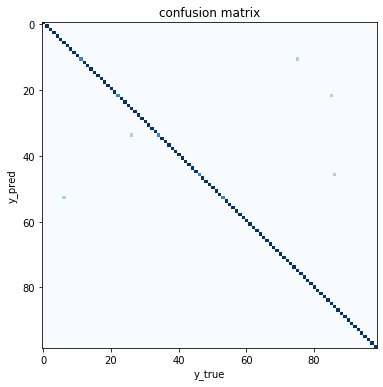

In [85]:
cm = confusion_matrix(y_pred=ts_pred, y_true=y_test)

plt.figure(figsize=(6,6))
plt.imshow(cm, aspect="auto", cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("y_true")
plt.ylabel("y_pred")

In [84]:
confusion_matrix?

In [47]:
N = 10
splits = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [48]:
train_results = []
test_results = []

for split in progressbar.ProgressBar()(splits):
    
    rtrain = []
    rtest = []

    for i in range(N):

        # get data
        X_train, _,_, y_train, X_test, _,_, y_test, species, num_classes, _, _ = lib.get_splitted_data(data_dir=data_dir, split=split)

        # model
        model = LinearDiscriminantAnalysis()
        model.fit(X_train, y_train)

        # train results
        tr_pred = model.predict(X_train)
        train_accuracy = (tr_pred == y_train).mean()

        # test results
        ts_pred = model.predict(X_test)
        test_accuracy = (ts_pred == y_test).mean()

        rtrain.append(train_accuracy)
        rtest.append(test_accuracy)
    
    train_results.append(rtrain)
    test_results.append(rtest)
    

100% (7 of 7) |##########################| Elapsed Time: 0:00:11 Time:  0:00:11


In [49]:
tr_m = [np.mean(i) for i in train_results]
tr_s = [np.std(i) for i in train_results]

In [55]:
ts_m = np.array([np.mean(i) for i in test_results])
ts_s = np.array([np.std(i) for i in test_results])

Text(0, 0.5, 'accuracy')

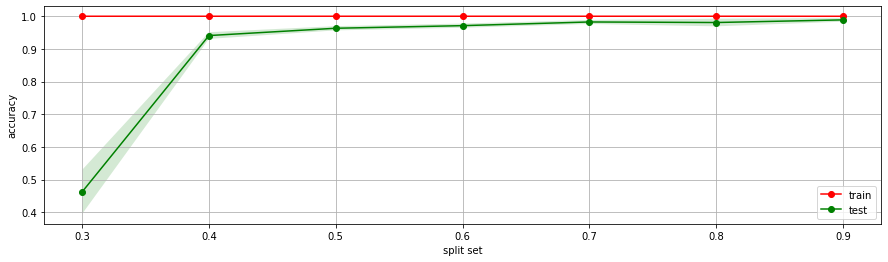

In [62]:
plt.figure(figsize=(15,4))

plt.plot(tr_m, label="train", color="red", marker="o")
plt.plot(ts_m, label="test", color="green", marker="o")
plt.fill_between(range(len(splits)), ts_m+ts_s, ts_m-ts_s, facecolor='green', interpolate=True, alpha=0.17)

plt.grid()
plt.legend()
_=plt.xticks(range(len(splits)), splits)
plt.xlabel("split set")
plt.ylabel("accuracy")